In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
import os
os.getcwd()


'C:\\Users\\sneha'

In [11]:
df = pd.read_csv(
    r"C:\Users\sneha\Data Analyst Project\COVID clinical trials .csv",
    low_memory=False
)

df.head()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [12]:
df = df.drop(columns=["Rank"])


In [13]:
df.columns


Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [14]:
drop_cols = [
    "Funded Bys",
    "Study Designs",
    "Other IDs",
    "Primary Completion Date",
    "First Posted",
    "Results First Posted",
    "Last Update Posted",
    "URL"
]

df = df.drop(columns=drop_cols)


In [15]:
df.shape
df.columns


Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Study Type', 'Start Date', 'Completion Date', 'Locations',
       'Study Documents'],
      dtype='object')

In [16]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)


In [17]:
df.isnull().sum().sort_values(ascending=False)


study_documents          5601
acronym                  3303
phases                   2461
interventions             886
locations                 585
completion_date            36
outcome_measures           35
start_date                 34
enrollment                 34
gender                     10
age                         0
title                       0
sponsor_collaborators       0
study_type                  0
conditions                  0
study_results               0
status                      0
nct_number                  0
dtype: int64

In [18]:
text_cols = [
    "study_documents",
    "acronym",
    "phases",
    "interventions",
    "locations"
]

for col in text_cols:
    df[col] = df[col].fillna("Not Available")


In [19]:
df["start_date"] = pd.to_datetime(df["start_date"], errors="coerce")
df["completion_date"] = pd.to_datetime(df["completion_date"], errors="coerce")


In [20]:
df.isnull().sum()


nct_number                  0
title                       0
acronym                     0
status                      0
study_results               0
conditions                  0
interventions               0
outcome_measures           35
sponsor_collaborators       0
gender                     10
age                         0
phases                      0
enrollment                 34
study_type                  0
start_date                520
completion_date          1525
locations                   0
study_documents             0
dtype: int64

In [21]:
df["outcome_measures"] = df["outcome_measures"].fillna("Not Available")


In [22]:
df["gender"] = df["gender"].fillna("All")


In [23]:
df["enrollment"] = df["enrollment"].fillna(0)


In [26]:
df.isnull().sum()


nct_number                  0
title                       0
acronym                     0
status                      0
study_results               0
conditions                  0
interventions               0
outcome_measures            0
sponsor_collaborators       0
gender                      0
age                         0
phases                      0
enrollment                  0
study_type                  0
start_date                520
completion_date          1525
locations                   0
study_documents             0
dtype: int64

In [27]:
df["start_year"] = df["start_date"].dt.year


In [28]:
df["start_month"] = df["start_date"].dt.month


In [29]:
df["completion_year"] = df["completion_date"].dt.year


In [30]:
df["start_month_name"] = df["start_date"].dt.month_name()


In [31]:
df[["start_date", "start_year", "start_month", "start_month_name"]].head()


,start_date,start_year,start_month,start_month_name
0,2020-11-09,2020.0,11.0,November
1,2020-11-02,2020.0,11.0,November
2,2020-05-07,2020.0,5.0,May
3,2020-05-25,2020.0,5.0,May
4,2020-05-05,2020.0,5.0,May


In [32]:
df["start_year"] = df["start_year"].astype("Int64")
df["start_month"] = df["start_month"].astype("Int64")


In [33]:
df["start_year"].value_counts().sort_index()


start_year
1998       1
2010       1
2011       2
2012       3
2013       3
2014       1
2015       2
2016       6
2017      24
2018      39
2019      93
2020    4245
2021     843
Name: count, dtype: Int64

In [35]:
df["start_month_name"].value_counts().reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])


start_month_name
January      329
February     328
March        627
April        965
May          684
June         527
July         377
August       277
September    326
October      283
November     257
December     283
Name: count, dtype: int64

In [36]:
df[["start_date", "start_year"]].head()


,start_date,start_year
0,2020-11-09,2020
1,2020-11-02,2020
2,2020-05-07,2020
3,2020-05-25,2020
4,2020-05-05,2020


In [37]:
df["status"] = df["status"].str.strip()


In [38]:
df_plot = df.dropna(subset=["start_year"])


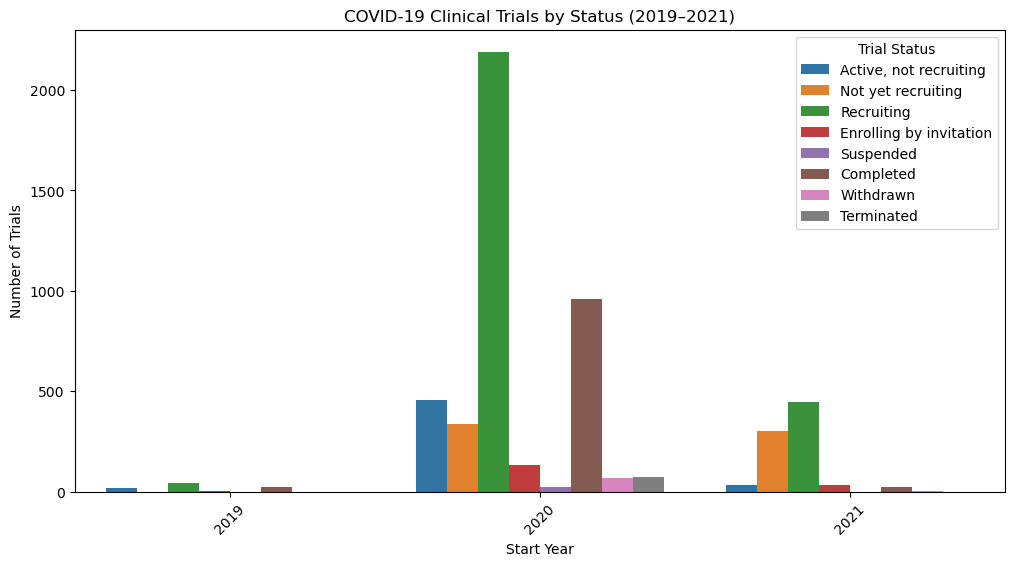

In [40]:
df_2020 = df_plot[df_plot["start_year"] >= 2019]

plt.figure(figsize=(12,6))
sns.countplot(data=df_2020, x="start_year", hue="status")
plt.title("COVID-19 Clinical Trials by Status (2019–2021)")
plt.xlabel("Start Year")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.legend(title="Trial Status")
plt.show()


Clinical trial activity surged sharply in 2020, with most studies in the recruiting stage, reflecting the urgent global response to COVID-19, while 2021 shows a decline as many trials moved toward completion.

In [42]:
print(df.columns.tolist())


['nct_number', 'title', 'acronym', 'status', 'study_results', 'conditions', 'interventions', 'outcome_measures', 'sponsor_collaborators', 'gender', 'age', 'phases', 'enrollment', 'study_type', 'start_date', 'completion_date', 'locations', 'study_documents', 'start_year', 'start_month', 'completion_year', 'start_month_name']


In [43]:
df["enrollment"].head()


0    1000.0
1      60.0
2     500.0
3    2500.0
4      50.0
Name: enrollment, dtype: float64

In [44]:
pd.to_numeric(df["enrollment"], errors="coerce")


0       1000.0
1         60.0
2        500.0
3       2500.0
4         50.0
         ...  
5778     566.0
5779     200.0
5780      88.0
5781     396.0
5782     716.0
Name: enrollment, Length: 5783, dtype: float64

In [45]:
df["enrollment"].describe()


count    5.783000e+03
mean     1.821178e+04
std      4.033550e+05
min      0.000000e+00
25%      6.000000e+01
50%      1.650000e+02
75%      5.500000e+02
max      2.000000e+07
Name: enrollment, dtype: float64

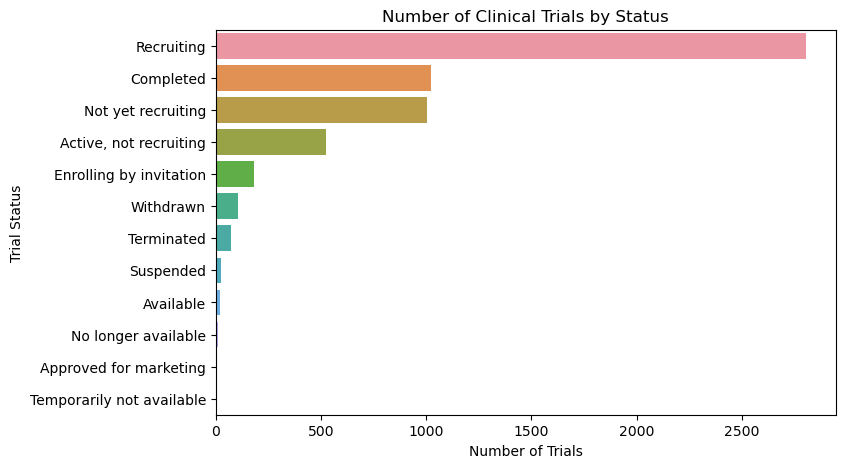

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    y="status",
    order=df["status"].value_counts().index
)

plt.title("Number of Clinical Trials by Status")
plt.xlabel("Number of Trials")
plt.ylabel("Trial Status")
plt.show()


 Most COVID-19 clinical trials are currently in the recruiting stage, followed by completed and not-yet-recruiting studies, indicating that a large portion of research is still actively ongoing.

In [58]:
df["country"] = df["locations"].str.split(",").str[-1].str.strip()


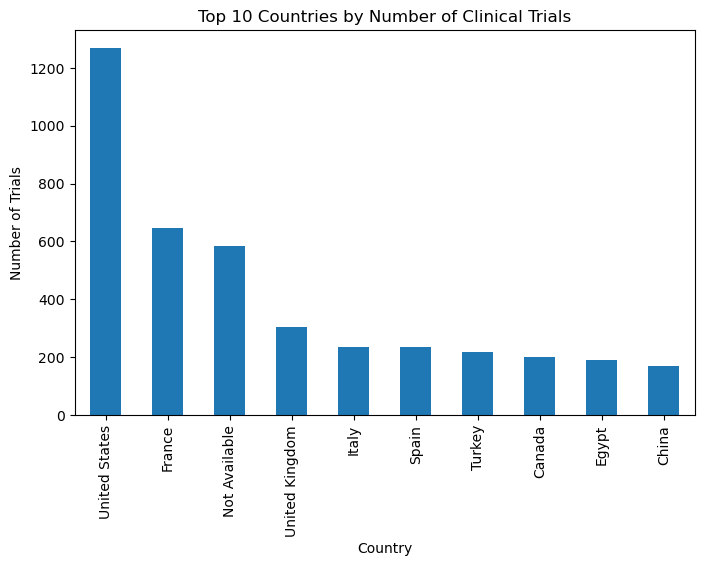

In [59]:
top_countries = df["country"].value_counts().head(10)

plt.figure(figsize=(8,5))
top_countries.plot(kind="bar")

plt.title("Top 10 Countries by Number of Clinical Trials")
plt.xlabel("Country")
plt.ylabel("Number of Trials")
plt.show()


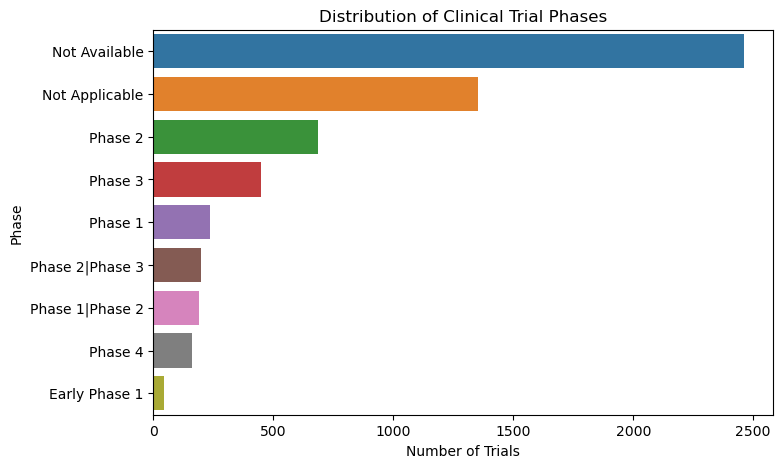

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    y="phases",
    order=df["phases"].value_counts().index
)

plt.title("Distribution of Clinical Trial Phases")
plt.xlabel("Number of Trials")
plt.ylabel("Phase")
plt.show()


Most COVID-19 clinical trials are concentrated in Phase 2 and Phase 3, indicating a strong focus on evaluating treatment effectiveness, while relatively fewer studies are in early or final phases.

In [69]:
# Drop missing values
lead_sponsor = df["sponsor_collaborators"].dropna()

# Take only the first sponsor (Lead Sponsor)
lead_sponsor = lead_sponsor.str.split("|").str[0]

lead_sponsor.head()


0    Groupe Hospitalier Paris Saint Joseph
1               United Medical Specialties
2             University of Milano Bicocca
3          Hong Kong Sanatorium & Hospital
4    Centre Hospitalier Régional d'Orléans
Name: sponsor_collaborators, dtype: object

In [70]:
lead_sponsor_counts = lead_sponsor.value_counts()
lead_sponsor_counts.head(10)


sponsor_collaborators
Assistance Publique - Hôpitaux de Paris                          101
Assiut University                                                 59
University Hospital, Montpellier                                  46
University Hospital, Strasbourg, France                           41
National Institute of Allergy and Infectious Diseases (NIAID)     34
Hospices Civils de Lyon                                           33
Cairo University                                                  31
University Hospital, Lille                                        28
Duke University                                                   27
University Hospital, Toulouse                                     26
Name: count, dtype: int64

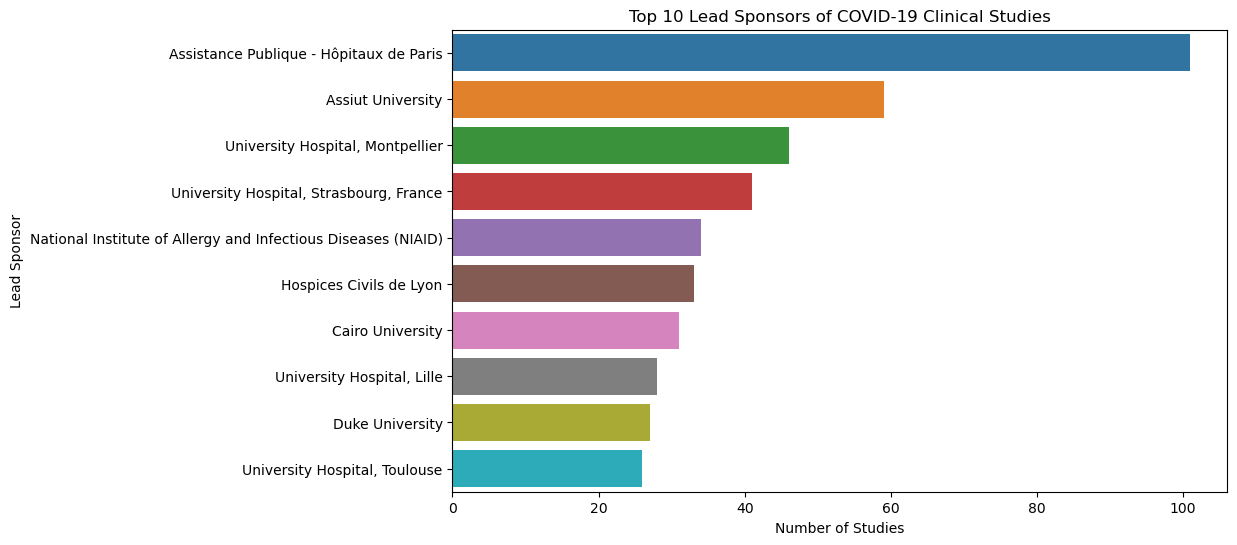

In [71]:
top_10_sponsors = lead_sponsor_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_sponsors.values,
    y=top_10_sponsors.index
)

plt.title("Top 10 Lead Sponsors of COVID-19 Clinical Studies")
plt.xlabel("Number of Studies")
plt.ylabel("Lead Sponsor")
plt.show()


Assistance Publique–Hôpitaux de Paris is the leading sponsor of COVID-19 clinical studies, followed by Assiut University, indicating that large public hospitals and academic institutions played a major role in driving COVID-19 research.

In [73]:
interventional_df = df[df["study_type"] == "Interventional"]


In [74]:
interventional_df["enrollment"].describe()


count    3.322000e+03
mean     8.194666e+03
std      3.478406e+05
min      0.000000e+00
25%      4.400000e+01
50%      1.080000e+02
75%      3.522500e+02
max      2.000000e+07
Name: enrollment, dtype: float64

In [76]:
# Copy only interventional trials with valid enrollment
size_df = interventional_df.copy()
size_df = size_df[size_df["enrollment"] > 0]

# Create size categories
def trial_size(enrollment):
    if enrollment <= 100:
        return "Small (≤100)"
    elif enrollment <= 500:
        return "Medium (101–500)"
    elif enrollment <= 1000:
        return "Large (501–1000)"
    else:
        return "Very Large (>1000)"

size_df["trial_size"] = size_df["enrollment"].apply(trial_size)


In [77]:
size_counts = size_df["trial_size"].value_counts()
print(size_counts)


trial_size
Small (≤100)          1535
Medium (101–500)      1076
Very Large (>1000)     358
Large (501–1000)       257
Name: count, dtype: int64


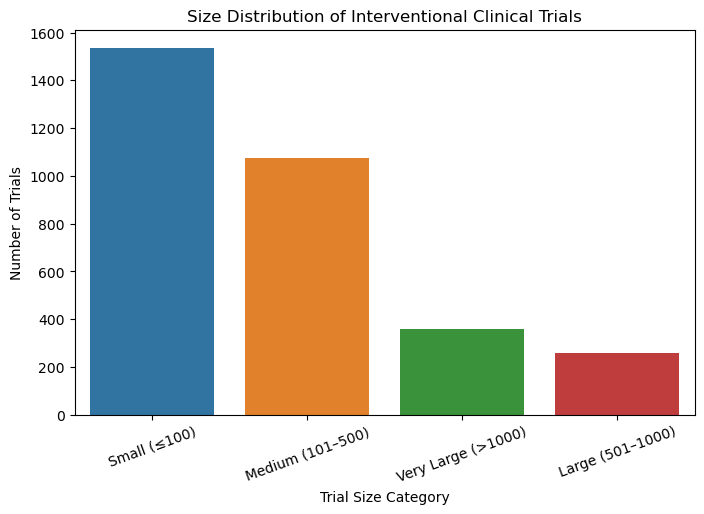

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=size_counts.index,
    y=size_counts.values
)

plt.title("Size Distribution of Interventional Clinical Trials")
plt.xlabel("Trial Size Category")
plt.ylabel("Number of Trials")
plt.xticks(rotation=20)
plt.show()


Most interventional clinical trials are small to medium in size (≤500 participants), while large and very large trials are relatively few, indicating that COVID-19 research was largely conducted through smaller, faster-to-execute studies.

In [79]:
phase_filtered = df["phases"].dropna()

phase_filtered = phase_filtered[
    ~phase_filtered.isin(["Not Applicable", "Not Available"])
]


In [80]:
phase_counts = phase_filtered.value_counts()
phase_counts


phases
Phase 2            685
Phase 3            450
Phase 1            234
Phase 2|Phase 3    200
Phase 1|Phase 2    192
Phase 4            161
Early Phase 1       46
Name: count, dtype: int64

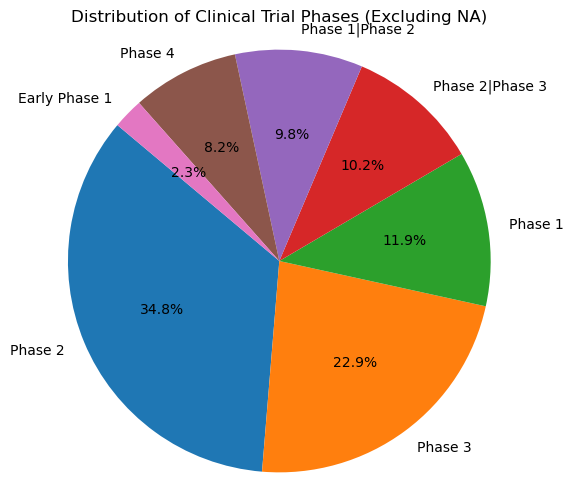

In [81]:
plt.figure(figsize=(6, 6))

plt.pie(
    phase_counts,
    labels=phase_counts.index,
    autopct="%1.1f%%",
    startangle=140
)

plt.title("Distribution of Clinical Trial Phases (Excluding NA)")
plt.axis("equal")
plt.show()

Phase 2 trials dominate the distribution, followed by Phase 3, showing that COVID-19 research largely focused on efficacy and safety evaluation. Early-phase and late-phase (Phase 4) studies form a much smaller share.

Conclusion:The analysis shows that COVID-19 clinical research was primarily concentrated in mid-stage development, with most trials conducted in Phase 2 and Phase 3, highlighting a strong global emphasis on evaluating treatment effectiveness and safety. Fewer trials were observed in early and post-marketing phases, indicating that research efforts were largely driven by the urgent need to validate and scale promising interventions during the pandemic.